In [ ]:
## mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import relevant Python libraries

import numpy as np
import pandas as pd+
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

In [ ]:
id = '1LRnC1nUbyb0ksadgTI_7rKZRY5Edk0xy'
link = f'https://drive.google.com/uc?id={id}'
glioma_df = pd.read_csv(link, on_bad_lines='skip')

#Dataset Exploration

In [ ]:
#The number of samples and features
data_size = glioma_df.shape
print(f"Number of Samples and Features: {data_size}")

Number of Samples and Features: (862, 27)


The dataset has 862 samples, and 27 features. The number of independent variables is 26 and the number of dependent variables is 1.

The dependent variable would be 'Grade' which is the 1st column of the the dataset. It is split into the parts: LGG to represent Low-Grade Glioma and and GBB to represent Glioblastoma Multiforme (high-grade gliomas).

\begin{align}
  \text{x ∈ } & R^{n \times p}
  \text{; n = 862, p = 26} \\[1em]
  \text{x ∈ } & R^{n \times m}
  \text{; n = 862, m = 1} \\[1em]
  \end{align}



In [ ]:
glioma_df.duplicated()
#No rows are duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
857    False
858    False
859    False
860    False
861    False
Length: 862, dtype: bool

In [ ]:
glioma_df.head(5)

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
glioma_df.tail(5)

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
861,GBM,TCGA-GBM,TCGA-06-2557,Male,76 years 221 days,Glioblastoma,black or african american,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
#glioma_df.info()
# Counting the number of '--' in each column
missing_values_custom = glioma_df.apply(lambda x: (x == '--').sum())
missing_values_custom_summary = missing_values_custom[missing_values_custom > 0]
print(missing_values_custom_summary)
print()
print('In percentage:')
print((missing_values_custom_summary /862)*100)



Gender               4
Age_at_diagnosis     5
Primary_Diagnosis    4
Race                 4
dtype: int64

In percentage:
Gender               0.464037
Age_at_diagnosis     0.580046
Primary_Diagnosis    0.464037
Race                 0.464037
dtype: float64


As seen above, not every piece of data is reported in the dataset. There are missing values reported as '--' that would have to be converted to NaN during pre-processing. However, there are no duplicate/repetitive features in the dataset.
Additionally, looking more into the data, a general idea behind the meaning of each of the columns can be derived.
Below is a quick overview [10]:

* **Grade**: The grade of the tumor (LGG for lower grade glioma, GBM for higher grade glioma).
* **Project**: The project code is TCGA (The Cancer Genome Atlas) for all grades, representing one of the two glioma datasets: [TCGA](https://www.cancer.gov/ccg/research/genome-sequencing/tcga#:~:text=The%20Cancer%20Genome%20Atlas%20(TCGA,samples%20spanning%2033%20cancer%20types.) and [CGGA](http://www.cgga.org.cn/about.jsp), programs that perform data collection for research.
* **Case_ID**: Unique identifier for each patient case
* **Gender**: Gender of the patient
* **Age_at_Diagnosis**: Age of the patient at the time of diagnosis
* **Primary_Diagnosis**: The primary diagnosis of the tumor.
* **Race**: Race of the patient
* **Columns IDH1 to PDGFRA**: Representing different genes, values indicate whether a mutation is present or not ("MUTATED" or "NOT_MUTATED")


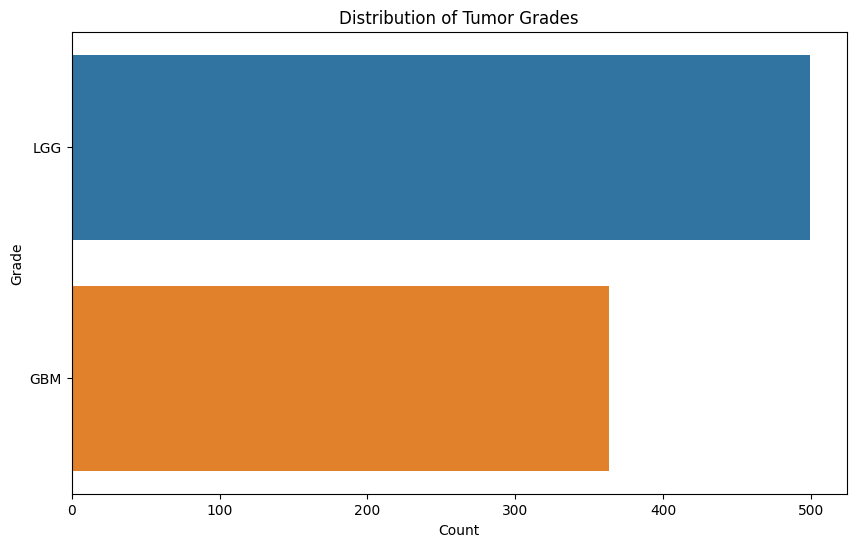

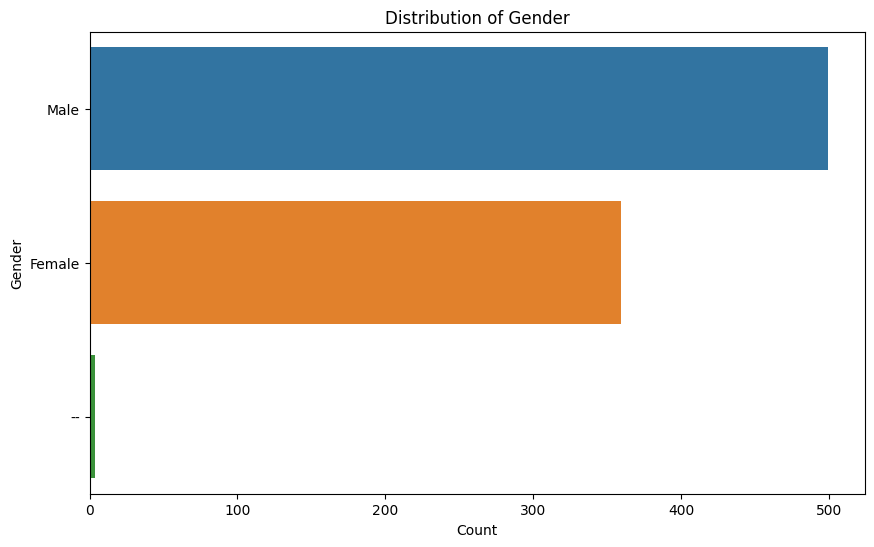

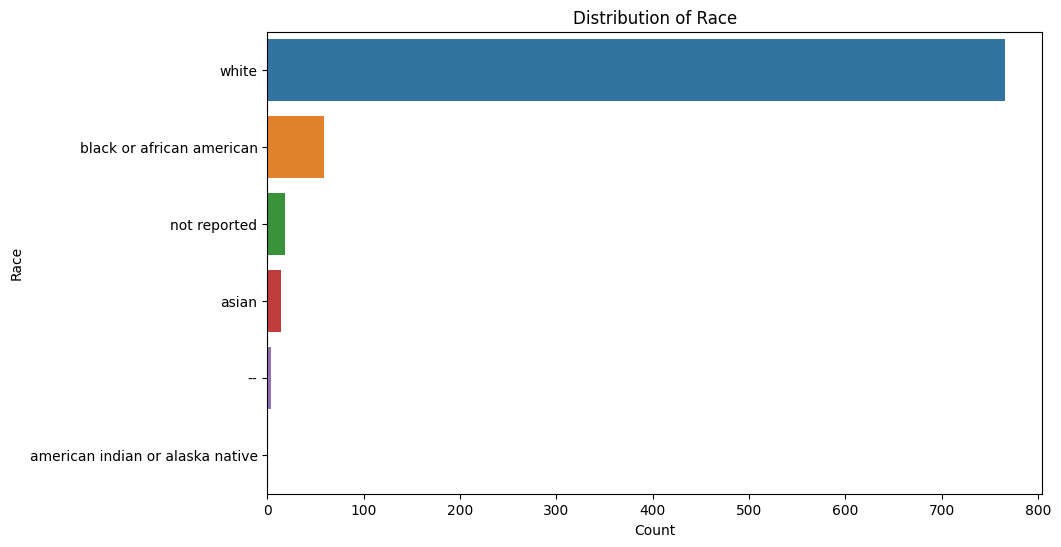

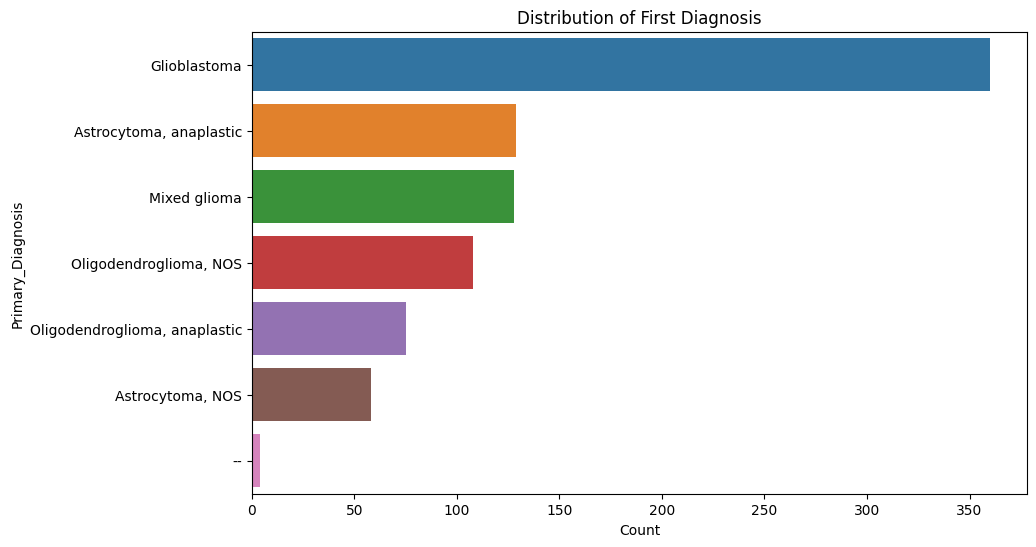

In [ ]:

#importing seaborn -- works with matplotlib
import seaborn as sns
def plot_categorical_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=glioma_df, order = glioma_df[column].value_counts().index)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

#plots for 'Grade', 'Gender', and 'Race'
plot_categorical_distribution(glioma_df, 'Grade', 'Distribution of Tumor Grades')
plot_categorical_distribution(glioma_df, 'Gender', 'Distribution of Gender')
plot_categorical_distribution(glioma_df, 'Race', 'Distribution of Race')
plot_categorical_distribution(glioma_df, 'Primary_Diagnosis', 'Distribution of First Diagnosis')

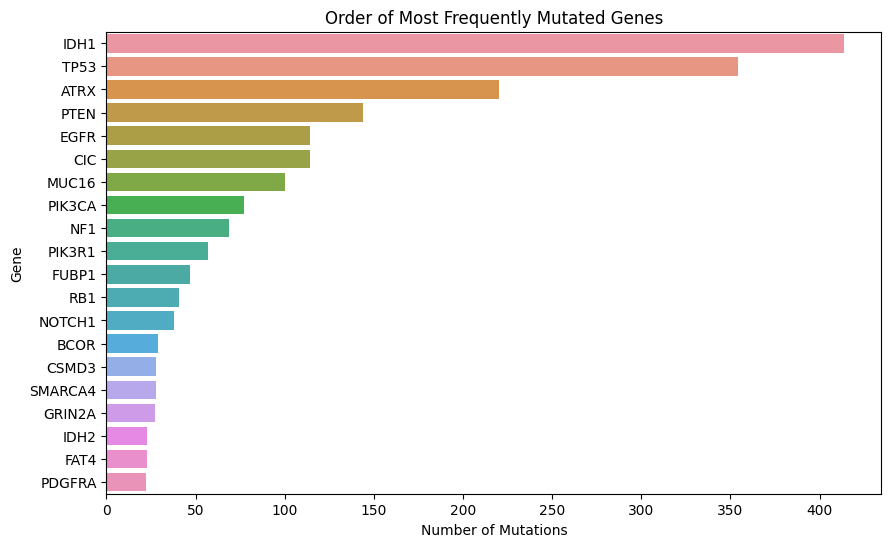

IDH1      414
TP53      354
ATRX      220
PTEN      144
EGFR      114
CIC       114
MUC16     100
PIK3CA     77
NF1        69
PIK3R1     57
dtype: int64

In [ ]:

mutation_columns = glioma_df.columns[7:]

#number of 'MUTATED' values for every gene
mutation_counts = glioma_df[mutation_columns].apply(lambda x: (x == 'MUTATED').sum())

#sorting values in descending order
sorted_mutation_counts = mutation_counts.sort_values(ascending=False)

#plotting the top 10 most frequently mutated genes
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_mutation_counts.head(20).values, y=sorted_mutation_counts.head(20).index)
plt.title('Order of Most Frequently Mutated Genes')
plt.xlabel('Number of Mutations')
plt.ylabel('Gene')
plt.show()

sorted_mutation_counts.head(10)

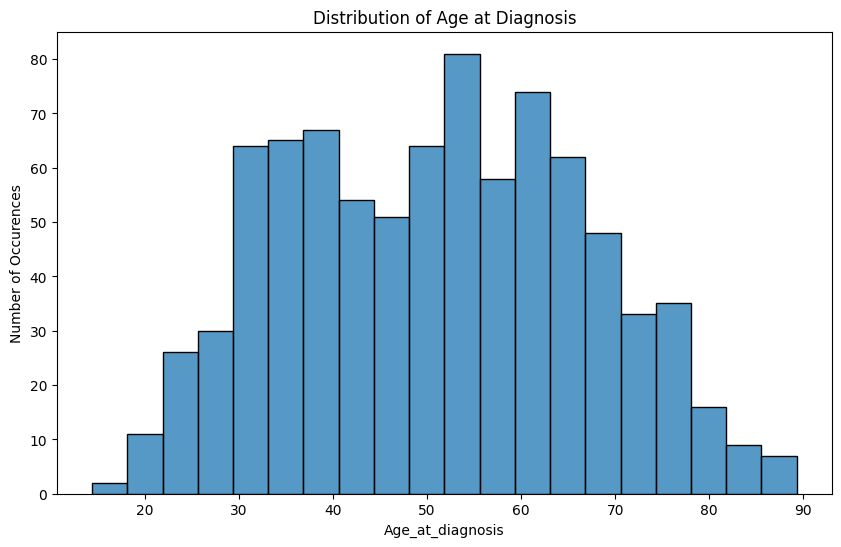

In [ ]:
def convert_age(age_str):
    if age_str == '--':
        return None

    parts = age_str.split()
    years = 0
    days = 0

    for i, part in enumerate(parts):
      #number before years represents years
        if part == 'years':
            years = int(parts[i - 1])
      #number before days represents days
        elif part == 'days':
            days = int(parts[i - 1])

    #turn days into years and get final year value
    days_as_years = days / 365.25
    total_years = years + days_as_years
    return round(total_years,2)


#convert all ages to numbers
glioma_df['Age_at_diagnosis'] = glioma_df['Age_at_diagnosis'].apply(convert_age)

def plot_numerical_distribution(data, column, title, bins=20):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Number of Occurences')
    plt.show()

#age plot
plot_numerical_distribution(glioma_df, 'Age_at_diagnosis', 'Distribution of Age at Diagnosis')

In terms of categorical variables, Case ID and Project cannot be considered categorical features since they do not contribute to the prediction of grades.

Out of the rest of 24 features, Columns 8 through 27 representing the genes,  are categorical variables that are binary encoded (MUTATED, NOT_MUTATED), which is a form of one-hot encoding (based on presence or absence of mutation).
Similarly, Grade, Gender, Race, and Primary Diagnosis are also one-hot encoded (with distinct categories).

Age, however, is not categorical since it is a continuous variable. It will therefore be considered a numerical variable.



#Pre-processing of dataset

We are not going to split this data. We are going to pre-process and perform feature selection on the entire dataset. Later on, we will perform processing using K-fold cross-validation.  

Steps for Pre-processing:

* Handle Missing Values
* Handle Invalid Values
* Encode the columns

In [ ]:
#Independent features
X = glioma_df.drop('Grade', axis=1)

#Dependent feature
y = glioma_df['Grade']

#storing training data into glioma_new
glioma_new = X
glioma_new['Grade'] = y
columns_train = ['Grade'] + [col for col in glioma_new.columns if col != 'Grade']
glioma_new = glioma_new[columns_train]


In [ ]:
pd.options.mode.chained_assignment = None

#Replace missing values in age column with mean age
mean_age = round(glioma_new['Age_at_diagnosis'].mean(),2)
glioma_new['Age_at_diagnosis'].fillna(mean_age, inplace=True)

Thanks to the data exploration in the previous parts, notice that invalid values such as age < 0 or Grade other than LGG and GBM are not present in the dataset. This can be seen from the histograms plotted above. Therefore, invalid values are not a part of the dataset. Also, note that convert_age function was utilized to return all missing values as NaN. These missing values were later replaced by mean age in the dataset.

We can now move onto handling missing values in other columns and cleaning up the rest of the data.

In [ ]:
#Label Encoding for gender, grade, and genes
glioma_new['Grade'] = glioma_new['Grade'].map({'LGG': 0, 'GBM': 1})
glioma_new['Gender'] = glioma_new['Gender'].map({'Male': 0, 'Female': 1})

#Take the mode of all Gender values and replace missing values with it
mode_gender = glioma_new['Gender'].mode()[0]
glioma_new['Gender'].fillna(mode_gender, inplace=True)

#cast these values as int in the dataset
glioma_new['Gender'] = glioma_new['Gender'].astype(int)

#encoding genes for training data
mutation_columns = glioma_new.columns[7:]
for col in mutation_columns:
    glioma_new[col] = glioma_new[col].map({'NOT_MUTATED': 0, 'MUTATED': 1})

**Note**: Genereally, there are two ways to handle missing values:
1. Deleting the Missing Values
2. Imputing the Missing Values

Out of the three categories of missing data, MNAR, MCAR, and MAR, the most appropriate section the missing values could fall under is MNAR (Missing Not At Random), since only some column values are missing for each of the participants who has not reported for variables such as age or primary diagnosis. Additionally, there is no pattern in missed values. Example, some missed values are for patients with LGG while others are for GBM.  
Therefore, we have decided to impute the missing values with their mean (for numerical features) and mode (for categorical features).


In [ ]:
#Unique Values for Primary_diagnosis and Race
print(glioma_new['Primary_Diagnosis'].unique())
print(glioma_new['Race'].unique())

['Oligodendroglioma, NOS' 'Mixed glioma' 'Astrocytoma, NOS'
 'Astrocytoma, anaplastic' 'Oligodendroglioma, anaplastic' '--'
 'Glioblastoma']
['white' 'asian' 'black or african american' '--' 'not reported'
 'american indian or alaska native']


In [ ]:
mode_diagnosis = glioma_new[glioma_new['Primary_Diagnosis'] != '--']['Primary_Diagnosis'].mode()[0]
glioma_new['Primary_Diagnosis'].replace('--', mode_diagnosis, inplace=True)
glioma_new['Primary_Diagnosis'].unique()
from sklearn.preprocessing import LabelEncoder

le_diagnosis = LabelEncoder()

#transform the 'Primary_Diagnosis' column
glioma_new['Primary_Diagnosis'] = le_diagnosis.fit_transform(glioma_new['Primary_Diagnosis'])
label_mapping = {index: label for index, label in enumerate(le_diagnosis.classes_)}
print("Label encoding mapping for 'Primary_Diagnosis':")
print(label_mapping)

print(glioma_new['Primary_Diagnosis'].unique())


Label encoding mapping for 'Primary_Diagnosis':
{0: 'Astrocytoma, NOS', 1: 'Astrocytoma, anaplastic', 2: 'Glioblastoma', 3: 'Mixed glioma', 4: 'Oligodendroglioma, NOS', 5: 'Oligodendroglioma, anaplastic'}
[4 3 0 1 5 2]


In [ ]:
mode_race = glioma_new[glioma_new['Race'].isin(['white', 'asian', 'black or african american', 'american indian or alaska native'])]['Race'].mode()[0]
glioma_new['Race'].replace(['--', 'not reported'], mode_race, inplace=True)

le_race = LabelEncoder()

#label encode the Race column
glioma_new['Race'] = le_race.fit_transform(glioma_new['Race'])
#transform the 'Race' column
race_mapping = {index: label for index, label in enumerate(le_race.classes_)}
print("Label encoding mapping for 'Race':")
print(race_mapping)

print(glioma_new['Race'].unique())



Label encoding mapping for 'Race':
{0: 'american indian or alaska native', 1: 'asian', 2: 'black or african american', 3: 'white'}
[3 1 2 0]


In [ ]:
for column in glioma_new.columns:
    print(f"{column}: {glioma_new[column].head(5).to_list()}")

Grade: [0, 0, 0, 0, 0]
Project: ['TCGA-LGG', 'TCGA-LGG', 'TCGA-LGG', 'TCGA-LGG', 'TCGA-LGG']
Case_ID: ['TCGA-DU-8164', 'TCGA-QH-A6CY', 'TCGA-HW-A5KM', 'TCGA-E1-A7YE', 'TCGA-S9-A6WG']
Gender: [0, 0, 0, 1, 0]
Age_at_diagnosis: [51.3, 38.71, 35.17, 32.77, 31.51]
Primary_Diagnosis: [4, 3, 0, 1, 1]
Race: [3, 3, 3, 3, 3]
IDH1: [1, 1, 1, 1, 1]
TP53: [0, 0, 1, 1, 1]
ATRX: [0, 0, 1, 1, 1]
PTEN: [0, 0, 0, 0, 0]
EGFR: [0, 0, 0, 0, 0]
CIC: [0, 1, 0, 0, 0]
MUC16: [0, 0, 0, 1, 0]
PIK3CA: [1, 0, 0, 0, 0]
NF1: [0, 0, 0, 0, 0]
PIK3R1: [0, 0, 0, 1, 0]
FUBP1: [1, 0, 0, 0, 0]
RB1: [0, 0, 0, 0, 0]
NOTCH1: [0, 0, 0, 0, 0]
BCOR: [0, 0, 0, 0, 0]
CSMD3: [0, 0, 0, 0, 0]
SMARCA4: [0, 0, 0, 0, 0]
GRIN2A: [0, 0, 0, 0, 0]
IDH2: [0, 0, 0, 0, 0]
FAT4: [0, 0, 0, 1, 0]
PDGFRA: [0, 0, 0, 0, 0]


As you can see above, we have encoded all our data. Notice that for binary values, we used label encoding since we would only need 1s and 0s.
* **Glioma grade class** (0 = "LGG"; 1 = "GBM")
* **Gender** (0 = "male"; 1 = "female")
* **All Gene Variables** (0 = NOT_MUTATED; 1= MUTATED)

For other variables, such as **Race** and **Primary Diagnosis**, we had first decided to perform one-hot encoding and  chose not to perform label encoding even though it could have cost us less in terms of the size of the data.
The thinking proess was that for multiple categories in a variable, label encoding can be misleading since the data would be encoded like 0, 1, 2, 3... which can be misinterpreted by the model as ordinal data when in reality, it is nominal. Therefore, by one-hot encoding, we thought we made a better choice by creating new binary columns for each category in each of the variables in order to prevent any problems for the rest of the procedure.

That is until...

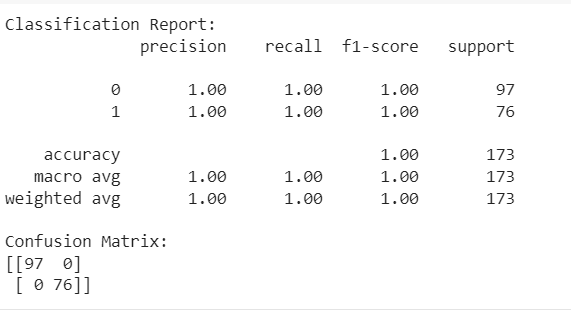


As we see above, one-hot encoding did not go so well.
The problem was, with one hot-encoding, we had way too many features (that were unnecessary).
Every category in, let's say, Race, became its own feature. Having too many features can lead to overfitting and fit the training data too well. The problem did not just end there. Because we had more features in the training data, the test data needed to be of the same size as the training. Therefore, we had to pre-process the test data as well.

> Adding more features like we did often adds complexity and makes for [sparse features](https://www.kdnuggets.com/2021/01/sparse-features-machine-learning-models.html#:~:text=If%20there%20are%20too%20many,the%20predictive%20power%20of%20models.) that have very few non-zero values in the dataset.

However, both sets of data also had missing values. The missing values for testing data had to be replaced by mean/mode values from the training data. Due to this, there was leakage in training data, which led to overfitting.
Also, notice that splitting also limited the cross-validation techniques we could use, where the only good choice was hold-out cross validation, which is the simplest cross-validation technique.



#Feature Learning/Extraction

First, let's begin by dropping two variables, Case_ID and Project. These columns only serve as unique identifiers and do not contribute to predictive modeling.

In [ ]:
glioma_new.drop(['Case_ID', 'Project'], axis=1, inplace=True)

In [ ]:
glioma_new.to_csv('/content/drive/MyDrive/Colab Notebooks/glioma_new.csv')

As for standardization, we note that with the exception of age_at_diagnosis, all features are binary categorical variables.[1] Standardization for these variables will not exactly be appropriate since our nicely formatted, easy-to-work-with binary encoded categories will become almost non-sensical.
If age need to be standardized for a classification method later on, it can easily be implemented then. For now, we will keep our data the same.

Next, we move onto Feature Selection.
For this prodecure, we are not standardizing any variables. Methods such as PCA may not be useful.

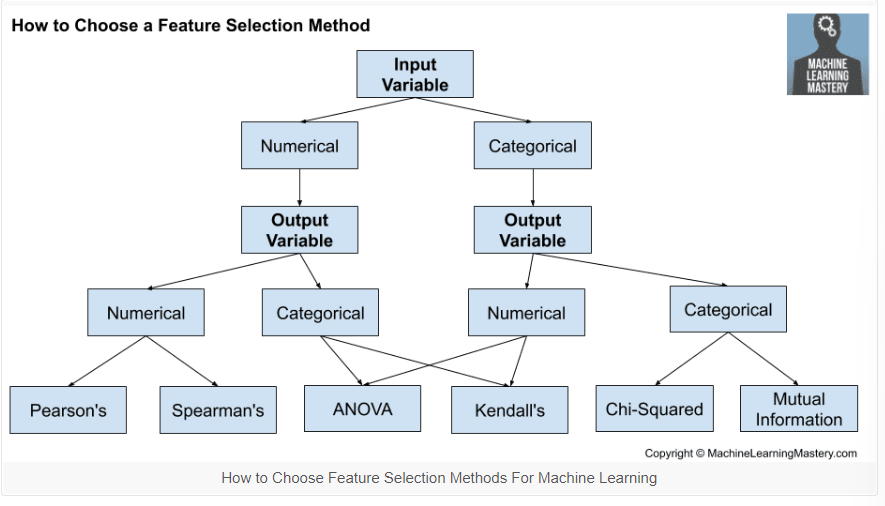

However, what could be useful based on the [image above](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) is either Chi-Squared [1] or Mutual Information methods for feature selection. The idea is that the dependent variable we are trying to predict is Categorical.

We will use Chi-Squared Test since it is straightforward and can be used to understand how independent two events are from each other.
We hypothesize that the greater the dependence between the target variable and an independent feature, the more we learn about the features that are the most important in determining the value of the target.

In this dataset, we are mostly curious about the gene features since those are the parts of the data most unfamiliar to us. This will also help build some domain knowledge in field of cancer research.

Describing some logistics of how we implemented this test, we first imported chi2 from sklearn.feature_selection module.
The chi2 function compares the observed frequency of each category of the feature with the frequency that would be expected if the feature and the target were independent. A high score would mean that the feature and the target have higher association. Here, the expected frequency under the assumption of independence is calculated by multiplying the total count of the feature (for both classes) and the total count of the target (across all features) and the dividing by total number of observations.

    Feature  Chi2 Statistic       P-value
0      IDH1      226.944993  2.764444e-51
3      PTEN       97.021930  6.856371e-23
5       CIC       69.685955  6.953950e-17
2      ATRX       61.959534  3.505883e-15
4      EGFR       44.062166  3.181105e-11
11      RB1       31.466867  2.028726e-08
12   NOTCH1       27.643287  1.458775e-07
10    FUBP1       27.629677  1.469075e-07
1      TP53       12.676052  3.703688e-04
6     MUC16       11.700280  6.249069e-04
16   GRIN2A       11.315094  7.687955e-04
17     IDH2       10.535054  1.171315e-03
15  SMARCA4        8.893161  2.862407e-03
9    PIK3R1        8.702480  3.177775e-03
19   PDGFRA        8.459101  3.632213e-03
8       NF1        7.119400  7.625421e-03
14    CSMD3        1.508479  2.193714e-01
18     FAT4        0.955324  3.283678e-01
7    PIK3CA        0.680590  4.093837e-01
13     BCOR        0.006375  9.363604e-01


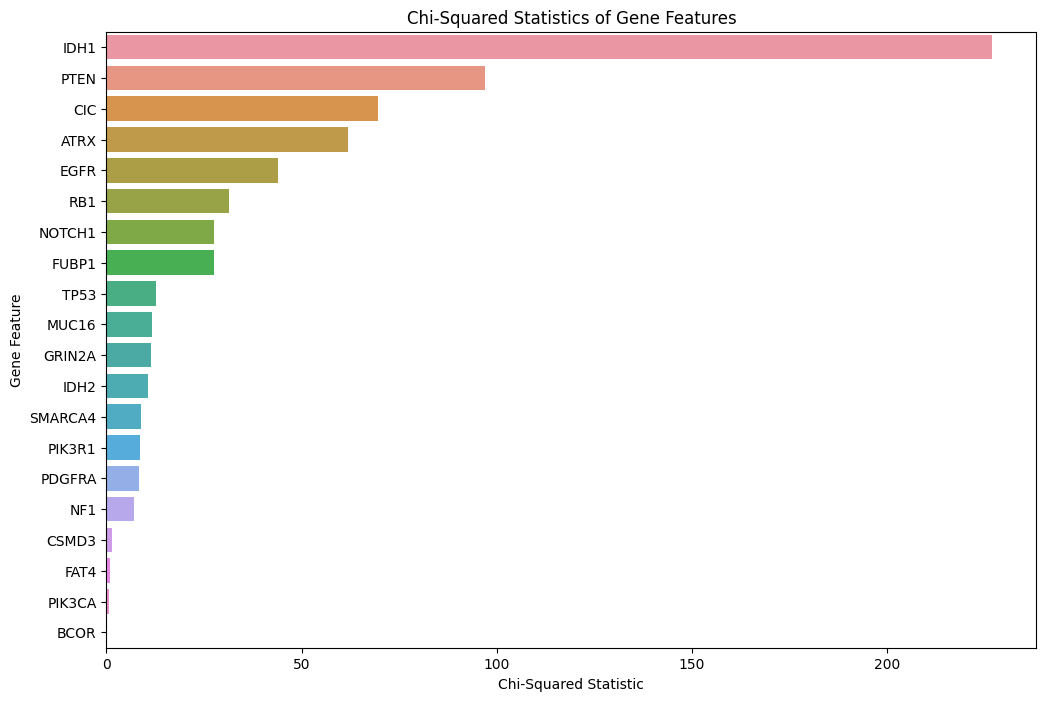

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#get all genes columns starting after the following diagnois column
start_index = glioma_new.columns.get_loc('Race') + 1
gene_columns = glioma_new.columns[start_index:]
X_genes = glioma_new[gene_columns]
y = glioma_new['Grade']

chi_scores_genes = chi2(X_genes, y)

#chi2 statistic: used to show strongly a feature is associated with target variable
#p2 value: probability that the association between the feature and the target variable is due to chance
chi_results_genes = pd.DataFrame({'Feature': X_genes.columns, 'Chi2 Statistic': chi_scores_genes[0], 'P-value': chi_scores_genes[1]})

#sort chi values in descending order and print
chi_results_genes = chi_results_genes.sort_values(by='Chi2 Statistic', ascending=False)
print(chi_results_genes)

#plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Chi2 Statistic', y='Feature', data=chi_results_genes.head(20))
plt.title('Chi-Squared Statistics of Gene Features')
plt.xlabel('Chi-Squared Statistic')
plt.ylabel('Gene Feature')
plt.show()


In [ ]:
glioma_new.head()

,Grade,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,4,3,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.71,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.77,1,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,1,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Observe the data above:

Among the gene features, PIK3CA, BCOR, FAT4 are the least associated with the 'Grade', as indicated by Chi2 Statistic Score and have the highest probability.
More objectively, their probabilities are a lot [greater than 5%](https://sites.radford.edu/~biol-web/stats/chi-sq_explanation.doc#:~:text=The%20larger%20the%20Chi%2Dsquare,really%20is%20a%20significant%20difference.), a common threshold that indicates that there is negligible association between each of the variables and the target variable.
Therefore, dropping these three variables should not affect our model predictions too much.


In [ ]:
#Dropping 3 gene_features
glioma_new = glioma_new.drop(['PIK3CA', 'BCOR', 'FAT4'], axis=1)


Next, we can move onto the feature selection for primary diagnosis.

       Feature  Chi2 Statistic        P-value
2  Diagnosis_2      495.636614  8.459862e-110
1  Diagnosis_1       93.841683   3.417975e-22
3  Diagnosis_3       93.114228   4.936160e-22
4  Diagnosis_4       78.565130   7.740371e-19
5  Diagnosis_5       54.559118   1.508411e-13
0  Diagnosis_0       42.192385   8.272151e-11


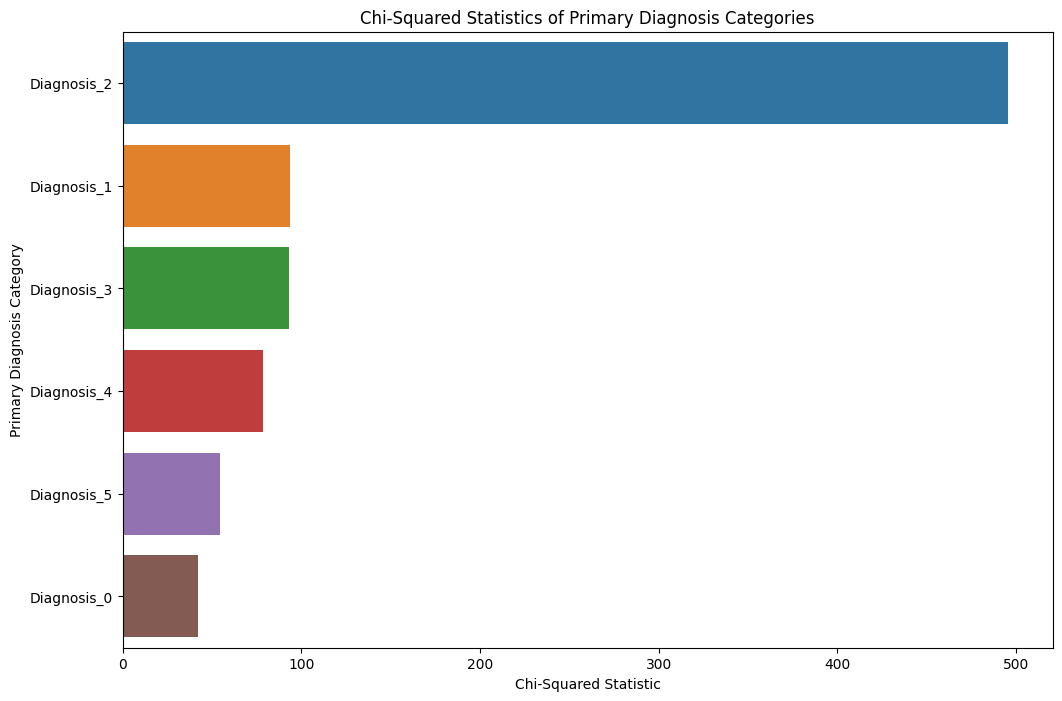

In [ ]:
diagnosis_encoded = pd.get_dummies(glioma_new['Primary_Diagnosis'], prefix='Diagnosis')

# Selecting the 'Primary_Diagnosis' column as a DataFrame
y = glioma_new['Grade']

chi_scores_diagnosis = chi2(diagnosis_encoded, y)

# Create a DataFrame to display Chi-Squared statistics and p-values
chi_results_diagnosis = pd.DataFrame({
    'Feature': diagnosis_encoded.columns,
    'Chi2 Statistic': chi_scores_diagnosis[0],
    'P-value': chi_scores_diagnosis[1]
}).sort_values(by='Chi2 Statistic', ascending=False)

print(chi_results_diagnosis)

plt.figure(figsize=(12, 8))
sns.barplot(x='Chi2 Statistic', y='Feature', data=chi_results_diagnosis)
plt.title('Chi-Squared Statistics of Primary Diagnosis Categories')
plt.xlabel('Chi-Squared Statistic')
plt.ylabel('Primary Diagnosis Category')
plt.show()

For Diagnosis features above, we see that the p-values are not at all higher than 5%. Additionally, there are no clear indications that a diagnosis maybe more associated with the target variable, except for the fact that it maybe just be more frequent than others.

#Processing of Dataset

##Logistic Regression

The first machine learning method we will use is Logistic Regression.
Logistic Regression is often used for categorical, linearly separable data like ours. We have a small to medium dataset, and we are going to choose logistic regression for its simplicity and because it is well-suited for binary classification problems.


In scikit learn, the logistic function (sigmoid) is implemented to model the probability that a given input belongs to a particular class.
The underlying algorithm in scikit-learn's Logistic Regression tries to find the coefficients that minimize a cost function.
This cost function is the log loss for binary classification.
Notice that we also have the solver set to  liblinear, an optimal choice since not only do we have a small dataset but also because it is a linear classification solver that supports logistic regression.
We also imported things like classification_report and accuracy_score from sklearn.metrics to evaluate the performance of the model.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = glioma_new.drop('Grade', axis=1)
y = glioma_new['Grade']

k = 10
#shuffle the data before splitting
kf = KFold(n_splits=k, shuffle=True, random_state=24)
model = LogisticRegression(solver = 'liblinear')

acc_score = []

for train_index, test_index in kf.split(X):

   #splitting data into training and test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train,y_train)
    y_pred_logreg = model.predict(X_test)

    acc = accuracy_score(y_pred_logreg , y_test)
    acc_score.append(acc)

avg_acc_score = np.mean(acc_score)
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Accuracy of each fold - [0.8850574712643678, 0.8850574712643678, 0.8953488372093024, 0.8255813953488372, 0.9069767441860465, 0.813953488372093, 0.9418604651162791, 0.8255813953488372, 0.8023255813953488, 0.9186046511627907]
Avg accuracy : 0.8700347500668271


We used Scikit-learn to implement logistic regression using 10 fold cross validation. Using scikit, we did not have to split the data manually when it ran thorugh each fold. We used 10 folds for the value of k. [2]
>CV first splits the data into k equal parts and then chooses k-1 folds for a training set. The remaining fold is used as test data. This is repeated k times, until the model is validated on every fold.

> To get the final score, we average the accuracies to get an accuracy of 87%.

This eliminates the need for splitting the data at the beginning into 80-20 (train-test) split. Instead, we split with each iteration.

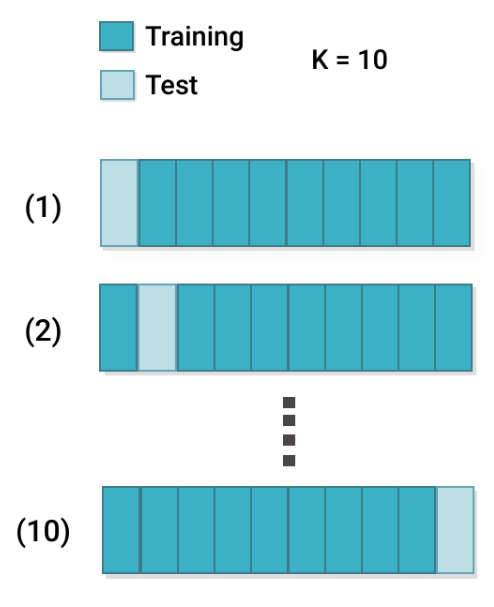

##KNN Classifier

Now we use KNN classifier method to train and test our dataset. This is another popular method for categorical data in supervised learning. The method uses an optimal k that is used to test the model on. Once again, we use k-fold cross validation [6] to implement this algorithm.

**Note**: The k for cross validation and k for KNN are not the same! One is used to define the value of the number of folds while the other is a hyperparameter in the KNN model.

We implement KNN from the KNeighborsClassifier class within the sklearn.neighbors module.
n_neighbors considers the k in KNN to represent the number of neighbors to consider for classification.
When fit is called, scikit-learn's KNN algorithm doesn't compute anything but essentially just stores the training data. This is because KNN is a lazy learner so it does not try to create an internal model, but simply stores the training data. So when predict is called, the algorithm computes the distance between that point and every point in the training set, then selects the nearest 'k' points.
Also, we should mention that we are using GridSearchCV, which performs a fit with each combination of parameters from the param_grid on the training dataset, and identifies the combination of parameters that gives the best average score (here we want the best knn to be selected by its accuracy score).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
import numpy as np

outer_kf = KFold(n_splits=10, shuffle=True, random_state=24)
outer_scores = []
y_pred = []

for train_index, test_index in outer_kf.split(X):
    #outer training and test set
    X_outer_train, X_outer_test = X.iloc[train_index], X.iloc[test_index]
    y_outer_train, y_outer_test = y.iloc[train_index], y.iloc[test_index]

    #inner loop for hyperparameter tuning
    inner_kf = KFold(n_splits=9, shuffle=True, random_state=24)
    param_grid = {'n_neighbors': range(2, 21)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=inner_kf, scoring='accuracy')

    #indices for training after hyperparameter tuning
    inner_train_indices, validation_indices = next(inner_kf.split(X_outer_train))

    #k-2 folds for hyperparameter tuning
    X_inner_train, X_validation = X_outer_train.iloc[inner_train_indices], X_outer_train.iloc[validation_indices]
    y_inner_train, y_validation = y_outer_train.iloc[inner_train_indices], y_outer_train.iloc[validation_indices]
    grid_search.fit(X_inner_train, y_inner_train)

    best_k = grid_search.best_params_
    #training on the validation fold
    best_knn = KNeighborsClassifier(**best_k) #unpack best_k
    best_knn.fit(X_validation, y_validation)

    y_pred_knn = best_knn.predict(X_test)

    #test on the outer test set
    outer_scores.append(accuracy_score(y_pred_knn, y_test))

average_outer_score = np.mean(outer_scores)
print(f'Average outer score: {average_outer_score}')


Average outer score: 0.8686046511627907


In this algorithm, we apply a couple of different steps.

Because KNN uses a hyperparameter (that is K) that needs to be optimized, we have to run nested cross-validation [2].
1. In the outerloop, we split the data into 10 folds, where each fold is used as a test set, with the remaining 9 being used for training.
2. Then there is an inner loop that further splits the 9 folds into 8 for tuning and 1 for validation. The best k is chosen to test on validation.
3. The trained model is tested on the outer test fold.
4. The inner loop is repeated until all the ranges for k in knn have been iterated through.
5. The outer loop repeats until all 10 folds are iterated through.

Finally, the accuracy in each fold is averaged to get the average accuracy overall which is 86.8%.

In [ ]:
from sklearn.metrics import classification_report

#classification report for Logistic Regression and KNN
report_logreg = classification_report(y_test, y_pred_logreg)
report_knn = classification_report(y_test, y_pred_knn)

print("Logistic Regression Classification Report:\n", report_logreg)
print("KNN Classification Report:\n", report_knn)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        59
           1       0.79      1.00      0.89        27

    accuracy                           0.92        86
   macro avg       0.90      0.94      0.91        86
weighted avg       0.94      0.92      0.92        86

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85        59
           1       0.65      0.81      0.72        27

    accuracy                           0.80        86
   macro avg       0.78      0.81      0.78        86
weighted avg       0.82      0.80      0.81        86



Let's dive intot the classification report above.
For both classifiers, there 59 cases of LGG and 27 cases of GBM in the test data.

For Logistic Regression:
* Every instance of LGG was correctly predicted as LGG. (Precision of 1)
* There is a high F1-Score of 0.94 and 0.89 indicates there is a good balance between precision and recall.
* For GBM cases, 79%  were correctly predicted.
* The average accuracy shows the proportion of correct predictions for both classes is about 0.92.

For KNN:
* 90% of LGG cases were correctly predicted.
* The model identified 80% of actual LGG instances.
* However, there is lower F1 score compared to logistic regression. Notable, only 65% of GBM cases were correctly identified which plays a key role in bringing down the F1 score for GBM.
* The overall accuracy was 80%.

Clearly, in all metrics, Logistic Regression outperformed KNN.

# Comparative Analysis

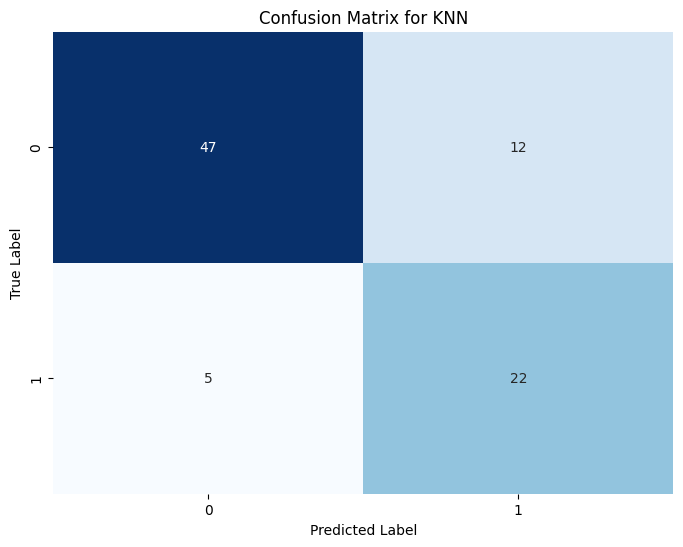

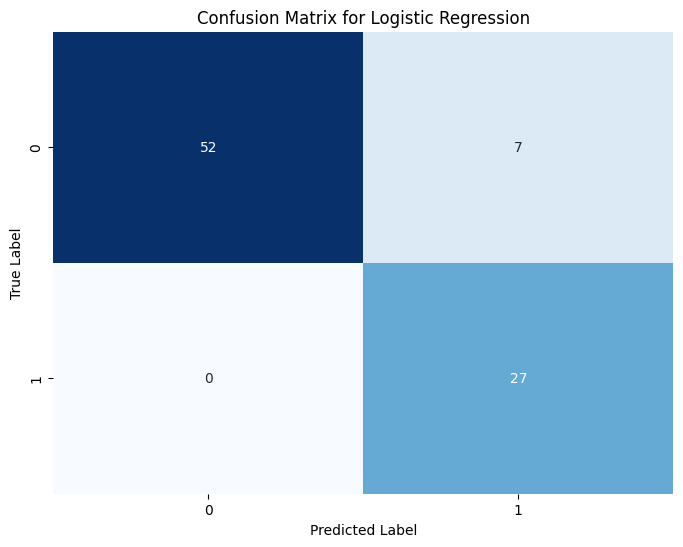

In [ ]:
from sklearn.metrics import confusion_matrix

#confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

#confusion matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

plot_confusion_matrix(conf_matrix_knn, 'Confusion Matrix for KNN')
plot_confusion_matrix(conf_matrix_logreg, 'Confusion Matrix for Logistic Regression')


**Computation**

In terms of computational complexity, KNN takes the cake since it has a nested loop. First (n * k) models are fit and evaluated for tuning the hyperparameter. But then this increases to (k * n * k) as the alorithm is implemented k more times for each fold in the outper loop due to the nested cross-validation.
Generally, a smaller value for k can be used in the inner loop to reduce this computational cost.

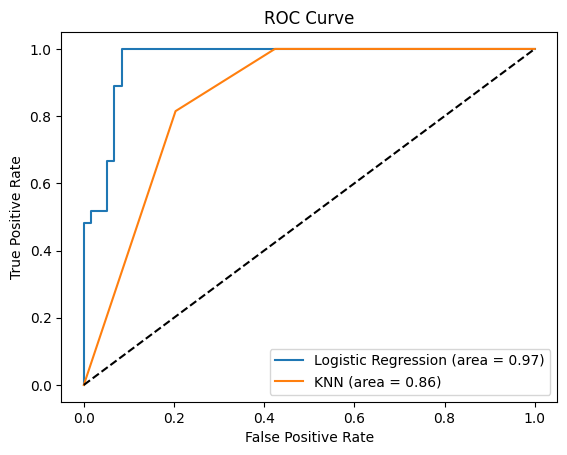

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

#plot roc curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

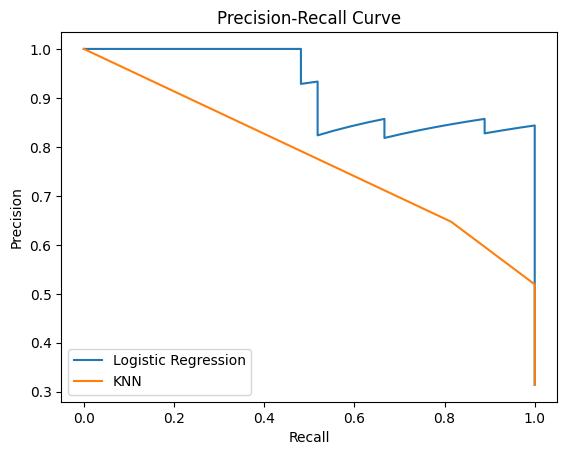

In [ ]:
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(y_test, best_knn.predict_proba(X_test)[:, 1])

#plot precision recall curve
plt.figure()
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.plot(recall_knn, precision_knn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
plt.show()


As we see from the above diagrams, it is better to use Logistic Regression than to use KNN classifier.

**Note**:
Correctly identifying cases of Glioma, especially GBM is crucial. A false alarm for a terminal medical condition (GBM) is not as bad as a false negative. KNN incorrectly predicts 5 instances as LGG when they are GBM. Logistic Regression has 0 cases of false negatives. In real life, the patient may not receive timely and urgent medical attention if they are misdiagnosed for a lower grade glioma when they actually have a more serious case of brain tumor.

And, the ROC and Precision Recall curves further confirm that Logistic Regression has better results. Take for instance the ROC curve, where Logistic Regression is closer to the upper left corner of the graph than KNN.

We would send **Logistic Regression** method into production for this dataset.

#Ethical Issues [3]

The most important discussion in recent times has to be the ethical issues with the use of AI in Medical Diagnosis.







- **Data Security** - Look at our own dataset. At least 4-5 people did not have things like Race, Age, and Gender listed. The reason for not having this information is unknown but the truth is they may have simply held back from giving out this data. The point being that personal data is sensitive. Most people do not feel comfortable releasing their private information. Therefore, it is crucial that AI/ML engineers comply with regulations such as [HIPAA](https://www.hhs.gov/hipaa/index.html) in the US and [GDPR](https://gdpr-info.eu/) in the Europe to protect people's private information and maintain anonymity. Misuse of any personal data is again protection laws of most countries.

> Consider the [algorithm](https://sagebionetworks.org/in-the-news/ibm-and-sage-bionetworks-announce-winners-of-first-phase-of-dream-digital-mammography-challenge/) developed by Yaroslav Nikulin and his team, from a French imaging company Therapixel, for *DREAM Digital Mammography Challenge*, who achieved an accuracy of 80.4% in breast cancer detection, and won the challenge.
To execute this challenge, the participants were not given any access to the data but had to rather send their code to the DREAM server using a Docker container. When run on DREAM server, the container accessed the data, and output visible to the participants was only the results and not any of the imaging or clinical data. This example shows a big step forward in data protection of healthcare systems.

- **Misdiagnosis**- Considerably the most obvious to the discussion, and mentioned earlier when analyzing the results for KNN model, misdiagnosis can discourage a patient from receiving the right medical care, especially in cases of terminal illnesses. This, in return, can lead to a general loss of trust for the medical system. Therefore, even with highly accurate models, it is best not to put people's healths into the hands of AI.

- **Bias** - Our dataset was not representative of a diverse patient population. Majority of participants were white. Less inclusivity in demographics can bring biases into the model. For example, it may become impossible to tell if one patient group is more likely to get a certain illness based on their demographic if their population was highly underrepresented in the first place when building the model. Therefore, mitigating biases ensures a model that is representative of different groups.

#Bibliography

1. Brownlee, Jason. “How to Choose a Feature Selection Method for Machine Learning.” Machine Learning Mastery, 26 Nov. 2019, [machinelearningmastery.com/feature-selection-with-real-and-categorical-data/](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/).

2. Brownlee, Jason. “Nested Cross-Validation for Machine Learning with Python.” Machine Learning Mastery, 28 July 2020, [machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/).

3. Carter, Stacy M., et al. “The Ethical, Legal and Social Implications of Using Artificial Intelligence Systems in Breast Cancer Care.” The Breast, vol. 49, Feb. 2020, pp. 25–32, [DOI](https://doi.org/10.1016/j.breast.2019.10.001).

4. Escobin, Mars. “How to Explore Datasets for Beginners.” Medium, 13 May 2020, [medium.com/@mars_escobin/how-to-explore-datasets-for-beginners-8ee30acb0d3](https://medium.com/@mars_escobin/how-to-explore-datasets-for-beginners-8ee30acb0d3).

5. “IBM and Sage Bionetworks Announce Winners of First Phase of DREAM Digital Mammography Challenge.” Sage Bionetworks, 2 June 2017, [sagebionetworks.org/in-the-news/ibm-and-sage-bionetworks-announce-winners-of-first-phase-of-dream-digital-mammography-challenge/](https://sagebionetworks.org/in-the-news/ibm-and-sage-bionetworks-announce-winners-of-first-phase-of-dream-digital-mammography-challenge/).

6. Lyashenko, Vladimir. “Cross-Validation in Machine Learning: How to Do It Right.” Neptune.ai, 21 July 2022, [neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right](https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right).

7. Tamboli, Nasima. “Tackling Missing Value in Dataset.” Analytics Vidhya, 29 Oct. 2021, [www.analyticsvidhya.com/blog/2021/10/handling-missing-value/](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/).

8. Tasci, Erdal, et al. “Hierarchical Voting-Based Feature Selection and Ensemble Learning Model Scheme for Glioma Grading with Clinical and Molecular Characteristics.” International Journal of Molecular Sciences, vol. 23, no. 22, 16 Nov. 2022, p. 14155, [DOI](https://doi.org/10.3390/ijms232214155).

9. Tasci, Erdal, et al. “UCI Machine Learning Repository.” Archive.ics.uci.edu, 13 Dec. 2022, [archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset](https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset).

10. Zhang, Delong, et al. “Identification of Hub Genes Related to Prognosis in Glioma.” Bioscience Reports, vol. 40, no. 5, May 2020, [DOI](https://doi.org/10.1042/bsr20193377).
